In [3]:
import numpy as np # linear algebra
import pandas as pd
import os

In [5]:
for dirname, _, filenames in os.walk('Downloads/archive (2)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Downloads/archive (2)\train.csv
Downloads/archive (2)\colored_images\Mild\0024cdab0c1e.png
Downloads/archive (2)\colored_images\Mild\00cb6555d108.png
Downloads/archive (2)\colored_images\Mild\0124dffecf29.png
Downloads/archive (2)\colored_images\Mild\01b3aed3ed4c.png
Downloads/archive (2)\colored_images\Mild\0369f3efe69b.png
Downloads/archive (2)\colored_images\Mild\03e25101e8e8.png
Downloads/archive (2)\colored_images\Mild\04ac765f91a1.png
Downloads/archive (2)\colored_images\Mild\059bc89df7f4.png
Downloads/archive (2)\colored_images\Mild\05a5183c92d0.png
Downloads/archive (2)\colored_images\Mild\0684311afdfc.png
Downloads/archive (2)\colored_images\Mild\06b71823f9cd.png
Downloads/archive (2)\colored_images\Mild\07929d32b5b3.png
Downloads/archive (2)\colored_images\Mild\07a1c7073982.png
Downloads/archive (2)\colored_images\Mild\086d41d17da8.png
Downloads/archive (2)\colored_images\Mild\09935d72892b.png
Downloads/archive (2)\colored_images\Mild\0a3202889f4d.png
Downloads/archive (2)\co

In [7]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CSV file
data_path = 'Downloads/archive (2)/train.csv'  # Replace with the correct path to your CSV file
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(df.head())

# Define the base directory for images
base_image_dir = 'Downloads/archive (2)/colored_images'  # Replace with the correct path to your image base directory

# Define a mapping from directory names to labels
label_mapping = {
    'No_DR': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Proliferate_DR': 4
}

# Preprocess images and labels
def preprocess_data(df, base_image_dir, label_mapping, img_size=(224, 224)):
    images = []
    labels = []

    for index, row in df.iterrows():
        for label_name, label_num in label_mapping.items():
            img_dir = os.path.join(base_image_dir, label_name)
            img_path = os.path.join(img_dir, row['id_code'] + '.png')
            if os.path.exists(img_path):
                image = cv2.imread(img_path)
                image = cv2.resize(image, img_size)
                image = image / 255.0  # Normalize to [0, 1]
                images.append(image)
                labels.append(label_num)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=5)  # One-hot encode the labels (assuming 5 classes)

    return images, labels

images, labels = preprocess_data(df, base_image_dir, label_mapping)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Training data shape: (2929, 224, 224, 3)
Validation data shape: (733, 224, 224, 3)


In [8]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [116]:
# Add an additional column, mapping to the type
df = pd.read_csv(r'Downloads/archive (2)/train.csv')

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: >

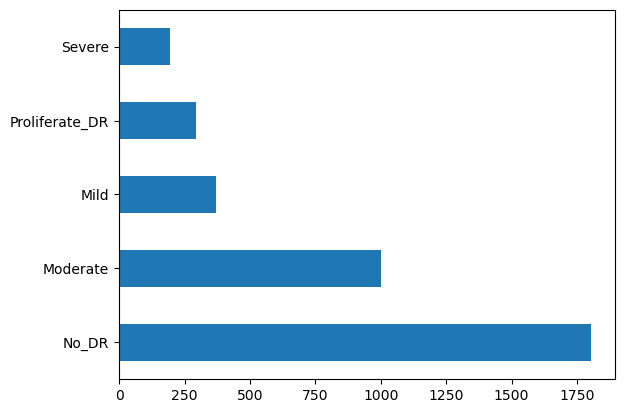

In [44]:
df['type'].value_counts().plot(kind='barh')

<Axes: >

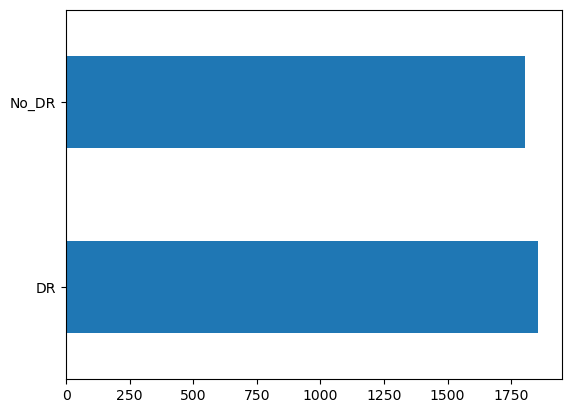

In [46]:
df['binary_type'].value_counts().plot(kind='barh')

In [48]:
# Split into stratified train, val, and test sets
train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

print(train['type'].value_counts(), '\n')
print(test['type'].value_counts(), '\n')
print(val['type'].value_counts(), '\n')

No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 

No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: type, dtype: int64 



In [50]:
# Create working directories for train/val/test
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [52]:
# Copy images to respective working directory
src_dir = 'Downloads/archive (2)/colored_images'
for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)


In [53]:
# Setting up ImageDataGenerator for train/val/test 

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2562 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


In [58]:


model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), input_shape=(224,224,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),                                                                                       
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (4,4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

history = model.fit(train_batches,
                    epochs=30,
                    steps_per_epoch=23,
                    validation_data=val_batches)


Epoch 1/30


C:\Users\ananya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - acc: 0.6435 - loss: 0.7781 - val_acc: 0.5073 - val_loss: 0.6902
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 550ms/step - acc: 0.8598 - loss: 0.3877 - val_acc: 0.5073 - val_loss: 0.6960
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 491ms/step - acc: 0.8954 - loss: 0.2853 - val_acc: 0.5073 - val_loss: 0.7087
Epoch 4/30
12/23 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - acc: 0.8925 - loss: 0.2944

C:\Users\ananya\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - acc: 0.8953 - loss: 0.2864 - val_acc: 0.5073 - val_loss: 0.7173
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 547ms/step - acc: 0.9179 - loss: 0.2517 - val_acc: 0.5073 - val_loss: 0.7425
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step - acc: 0.9175 - loss: 0.2428 - val_acc: 0.5073 - val_loss: 0.7695
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 501ms/step - acc: 0.9242 - loss: 0.2313 - val_acc: 0.5073 - val_loss: 0.7893
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - acc: 0.9031 - loss: 0.2758 - val_acc: 0.5073 - val_loss: 0.7849
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 548ms/step - acc: 0.9352 - loss: 0.1962 - val_acc: 0.5073 - val_loss: 0.7946
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 536ms/step - acc: 0.9395 - loss: 0.2182 - val_acc: 0.5073 - val_loss: 0.7956
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 514ms/step - acc: 0.9128 - loss: 0.2655 - val_acc: 0.5073 - val_loss: 0.8056
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - acc:

In [62]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_batches)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - acc: 0.9300 - loss: 0.1954
Validation loss: 0.2000826746225357
Validation accuracy: 0.9363636374473572


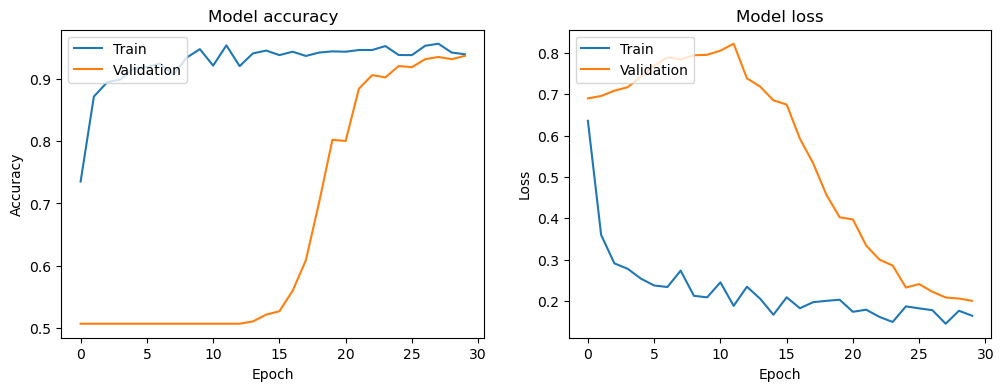

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [66]:
# Make predictions on the test set
predictions = model.predict(test_batches)

# Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Assuming test_batches has the true labels
true_classes = test_batches.classes

# Print a classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=test_batches.class_indices.keys()))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
              precision    recall  f1-score   support

          DR       0.90      0.94      0.92       279
       No_DR       0.93      0.89      0.91       271

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.92      0.91      0.91       550



In [78]:
# Save the model in the native Keras format
model.save('64x3-CNN.model.keras')

# Alternatively, save the model in HDF5 format
model.save('64x3-CNN.model.h5')




In [122]:
# Load the model
loaded_model = tf.keras.models.load_model('64x3-CNN.model.keras')  # or 'path/to/model.h5'

# Use the loaded model to make predictions
loaded_model_predictions = loaded_model.predict(test_batches)
loaded_model_predicted_classes = tf.argmax(loaded_model_predictions, axis=1).numpy()

# Print classification report for the loaded model
print(classification_report(true_classes, loaded_model_predicted_classes, target_names=test_batches.class_indices.keys()))


C:\Users\ananya\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step
              precision    recall  f1-score   support

          DR       0.90      0.94      0.92       279
       No_DR       0.93      0.89      0.91       271

    accuracy                           0.91       550
   macro avg       0.92      0.91      0.91       550
weighted avg       0.92      0.91      0.91       550



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


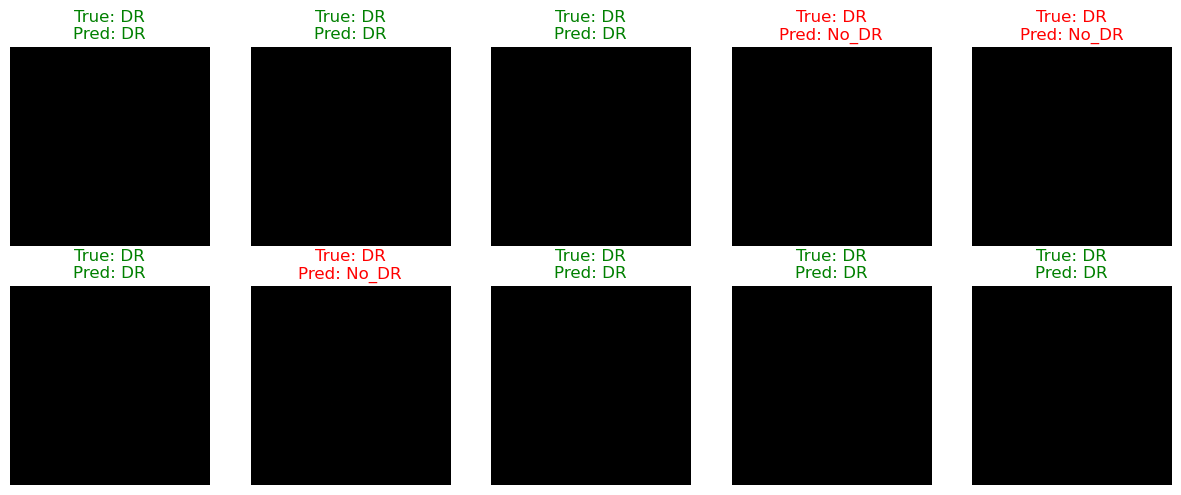

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images to display
num_images = 10

# Get a batch of test images and their true labels
test_images, test_labels = next(test_batches)

# Get predictions for the test images
predictions = model.predict(test_images)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Decode class indices to class names
class_names = list(test_batches.class_indices.keys())

# Ensure test_labels are in a format we can index directly
if test_labels.ndim > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Plot the images with their true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].astype("uint8"))
    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_classes[i]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis('off')
plt.show()
